In [110]:
from PIL import Image as Im
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [111]:
image = Im.open('./Downloads/Blobs/SR23.png')

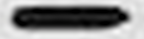

In [112]:
image

In [113]:
imL = image.convert(mode='L')

In [114]:
data = np.asarray(imL)

In [115]:
mask = np.zeros(data.shape)
mask.shape

(39, 144)

In [116]:
dataT = data.T

In [117]:
maskT = mask.T

In [118]:
def leftToRight(data, mask):
    for r in range (0, data.shape[0]):
        for i in range (1, data.shape[1]):
            if data[r, i] < data[r, i-1]*0.9:            
                mask[r, i] = data[r, i]
                break
            else:
                i +=1
        r +=1
    return mask

def rightToLeft(data, mask):
    for r in range (0, data.shape[0]):
        i= data.shape[1]-2
        while i > 0:

            
            if data[r, i] < data[r, i+1]*0.9:            
                mask[r, i] = data[r, i]
                
                break
            else:
                i -=1

        r +=1
    return mask

In [119]:
maskImg = Im.fromarray(mask).convert('L')

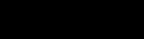

In [120]:
maskImg

In [121]:
mask  = leftToRight(data, mask)
mask = rightToLeft(data, mask)

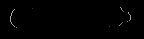

In [122]:
maskImg = Im.fromarray(mask).convert('L')
maskImg

In [123]:
maskT  = leftToRight(dataT, maskT)
maskT = rightToLeft(dataT, maskT)

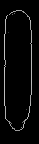

In [124]:
maskTImg = Im.fromarray(maskT).convert('L')
maskTImg

In [125]:
mask = maskT.T

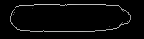

In [126]:
maskImg = Im.fromarray(mask).convert('L')
maskImg

In [127]:
def findExtr(mask):
    xmin = mask.shape[1]-1
    xmax = 0
    for r in range(0, mask.shape[0]):
        for i in range(0, mask.shape[1]):
            if (mask[r, i] !=0) & (i < xmin):
                xmin = i
                break
            else:
                i +=1
        r +=1
    for r in range(0, mask.shape[0]):
        i = mask.shape[1]-1
        while i > 0:
            if (mask[r, i] > 0) & (i>xmax):
                xmax=i
                break
            else:
                i -=1
        r +=1
    return xmin, xmax

In [128]:
findExtr(mask)

(10, 130)

In [129]:
mask

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0

In [130]:
findExtr(maskT)

(4, 31)

In [131]:
def dictCreator(x, y):
    arr = [x[0], x[1], y[0], y[1]]
    dict={'coords':arr}    
    return dict

In [132]:
dict = dictCreator(findExtr(mask), findExtr(maskT))
dict

{'coords': [10, 130, 4, 31]}

In [133]:
dataRGB = np.asarray(image).copy()

In [134]:
dict['coords'][0]

10

In [135]:
for a in range(dict['coords'][0], dict['coords'][1]):
    dataRGB[dict['coords'][2], a] = [255, 0 , 0]

In [136]:
RGB = Im.fromarray(dataRGB)

In [146]:
type(RGB)

PIL.Image.Image

In [138]:
for a in range(dict['coords'][0], dict['coords'][1]):
    dataRGB[dict['coords'][3], a] = [255, 0 , 0]

In [139]:

for a in range(dict['coords'][2], dict['coords'][3]):
    dataRGB[a, dict['coords'][0]] = [255, 0 , 0]
    dataRGB[a, dict['coords'][1]] = [255, 0 , 0]
    a +=1

In [140]:
# dataRGB[4, 119]

In [141]:
dataRGB[a, 0]

array([222, 223, 222], dtype=uint8)

In [142]:
def paint(image, dict):
    dataRGB = np.asarray(image).copy()
    for a in range(dict['coords'][0], dict['coords'][1]):
        dataRGB[dict['coords'][2], a] = [255, 0 , 0]
    for a in range(dict['coords'][0], dict['coords'][1]):
        dataRGB[dict['coords'][3], a] = [255, 0 , 0]
    for a in range(dict['coords'][2], dict['coords'][3]):
        dataRGB[a, dict['coords'][0]] = [255, 0 , 0]
        dataRGB[a, dict['coords'][1]] = [255, 0 , 0]
        a +=1
        RGB = Im.fromarray(dataRGB)
    return RGB

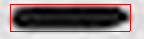

In [143]:
paint(image, dict)